In [1]:
from sklearn import datasets

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('../Data/Test2/global-2-2.csv')

In [4]:
df.iloc[:,[1,2,3]].values

array([[12.   ,  0.   ,  1.   ],
       [12.   ,  0.   ,  1.   ],
       [ 3.   ,  1.   ,  0.   ],
       ...,
       [11.   , -0.5  ,  0.866],
       [ 5.   ,  0.5  , -0.866],
       [ 6.   ,  0.   , -1.   ]])

In [5]:
df.shape[1] #nr of columns

18

In [6]:
df.shape[0] #nr of entries

24410

In [7]:
X_df = df.drop(['MAP_ID', 'MONTH', 'RISK_ZONE_ID'], axis=1)

In [12]:
X = X_df.values

In [13]:
y = df.loc[:,'RISK_ZONE_ID'].values

In [14]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [15]:
#split intro train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [16]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 

In [17]:
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 

In [18]:
y_pred = dtree_model.predict(X_test)

In [19]:
accuracy = dtree_model.score(X_test, y_test)

In [20]:
accuracy

0.4700966737669998

In [21]:
cm = confusion_matrix(y_test, y_pred)

In [22]:
cm

array([[1221,  388,  302,    0,    0],
       [ 691,  890,  480,    0,    0],
       [ 225,  467,  758,    0,    0],
       [  21,   59,  522,    0,    0],
       [   0,    0,   79,    0,    0]])

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df['risk_zone_nb']=df['RISK_ZONE_ID'].factorize()[0]
risk_zone_nb_df = df[['RISK_ZONE_ID','risk_zone_nb']].drop_duplicates().sort_values('risk_zone_nb')

nb_to_riskzone = dict(risk_zone_nb_df[['risk_zone_nb', 'RISK_ZONE_ID']]).values

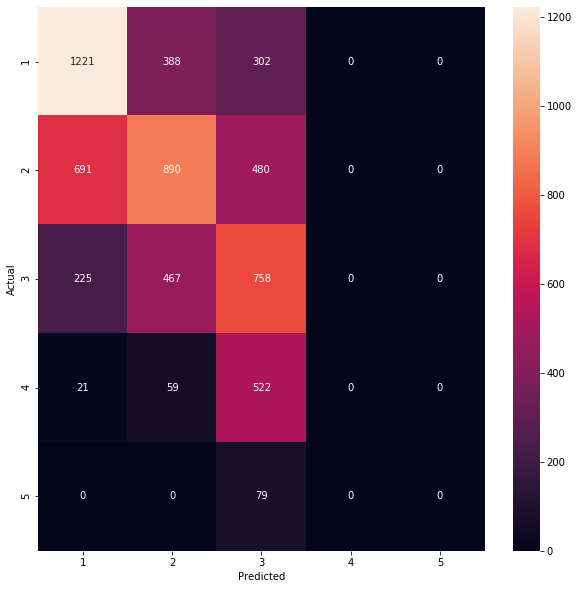

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=risk_zone_nb_df.RISK_ZONE_ID.values, yticklabels=risk_zone_nb_df.RISK_ZONE_ID.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [26]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.57      0.64      0.60      1911
           2       0.49      0.43      0.46      2061
           3       0.35      0.52      0.42      1450
           4       0.00      0.00      0.00       602
           5       0.00      0.00      0.00        79

    accuracy                           0.47      6103
   macro avg       0.28      0.32      0.30      6103
weighted avg       0.43      0.47      0.44      6103



/Users/dbotnari/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### support is the number of actual occurences of the class in the test data set. Imbalanced support in the training data may indicate the need for stratified sampling or rebalancing.
micro-average is preferable if there is a class imbalance problem. The micro-average is used in unbalanced datasets as this method takes the frequency of each class into consideration.
The micro-avg precision, recall and f1-score are mathematically equivalent

In [27]:
print('Cohen-Kappa score: ',metrics.cohen_kappa_score(y_test, y_pred))

Cohen-Kappa score:  0.24954489850011286


In [28]:
fi = dtree_model.feature_importances_
features = list(X_df.columns)

In [29]:
fi_df = pd.DataFrame(fi, index=features, columns=['f_imp']).sort_values(['f_imp'])

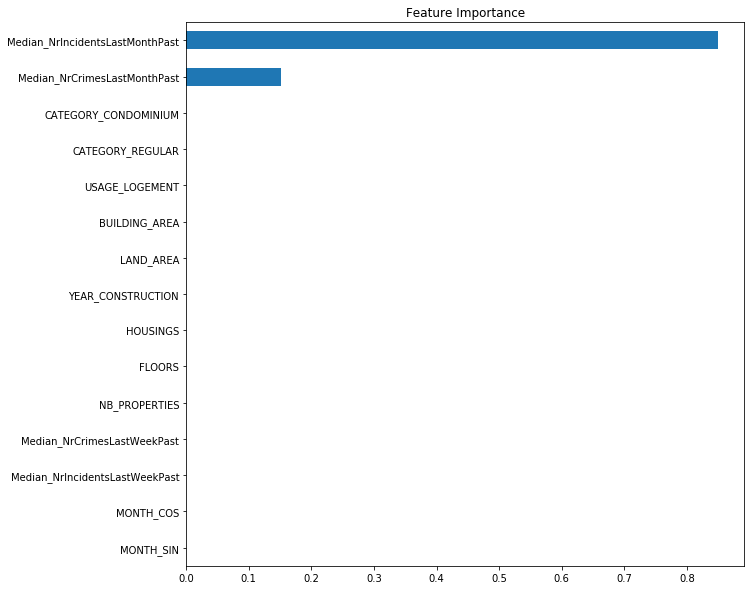

In [30]:
fi_df.plot(kind='barh', title = 'Feature Importance', figsize=(10,10),legend=None);

In [31]:
features

['MONTH_SIN',
 'MONTH_COS',
 'Median_NrIncidentsLastWeekPast',
 'Median_NrIncidentsLastMonthPast',
 'Median_NrCrimesLastWeekPast',
 'Median_NrCrimesLastMonthPast',
 'NB_PROPERTIES',
 'FLOORS',
 'HOUSINGS',
 'YEAR_CONSTRUCTION',
 'LAND_AREA',
 'BUILDING_AREA',
 'USAGE_LOGEMENT',
 'CATEGORY_REGULAR',
 'CATEGORY_CONDOMINIUM']

In [32]:
bad_features = fi_df.query('f_imp<0.001')
bad_features

,f_imp
MONTH_SIN,0.0
MONTH_COS,0.0
Median_NrIncidentsLastWeekPast,0.0
Median_NrCrimesLastWeekPast,0.0
NB_PROPERTIES,0.0
FLOORS,0.0
HOUSINGS,0.0
YEAR_CONSTRUCTION,0.0
LAND_AREA,0.0
BUILDING_AREA,0.0


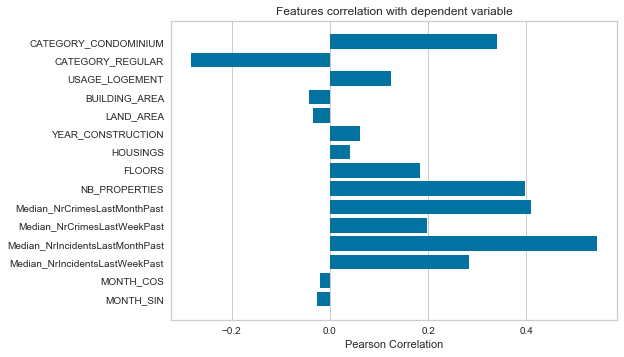

In [34]:
from yellowbrick.target import FeatureCorrelation

fc = FeatureCorrelation(labels=features)
fc.fit(X_train,y_train)
fc.show();

In [35]:
from yellowbrick.style import set_palette
set_palette('colorblind')

/Users/dbotnari/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/dbotnari/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.4700966737669998

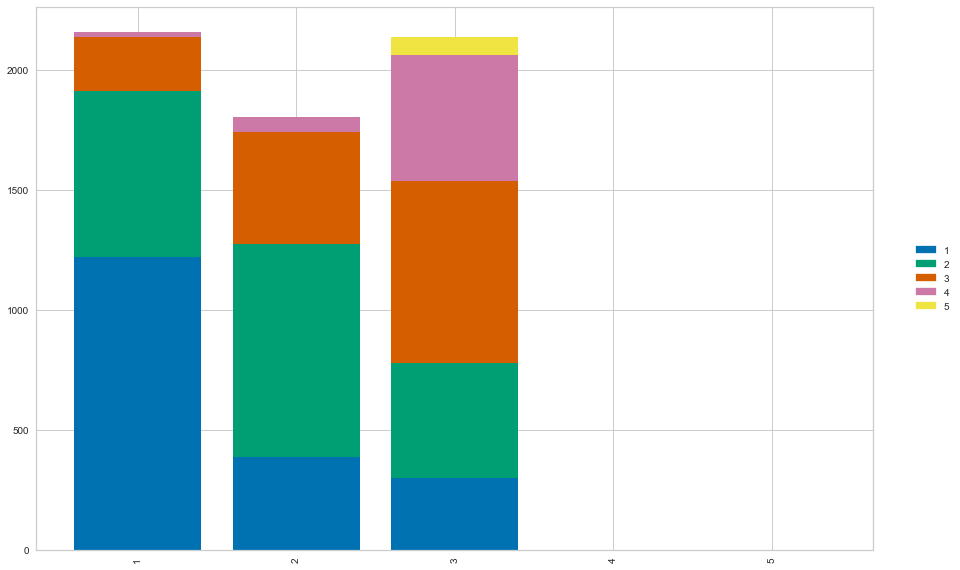

In [38]:
from yellowbrick.classifier import ClassPredictionError
my_title = "Class Prediction Error for Gradient Boosting Classifier"

#classes = ["1", "2", "3", "4", "5"]

cle = ClassPredictionError(dtree_model, size = (1080, 720), title=my_title, show=False)
cle.score(X_test, y_test)

/Users/dbotnari/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


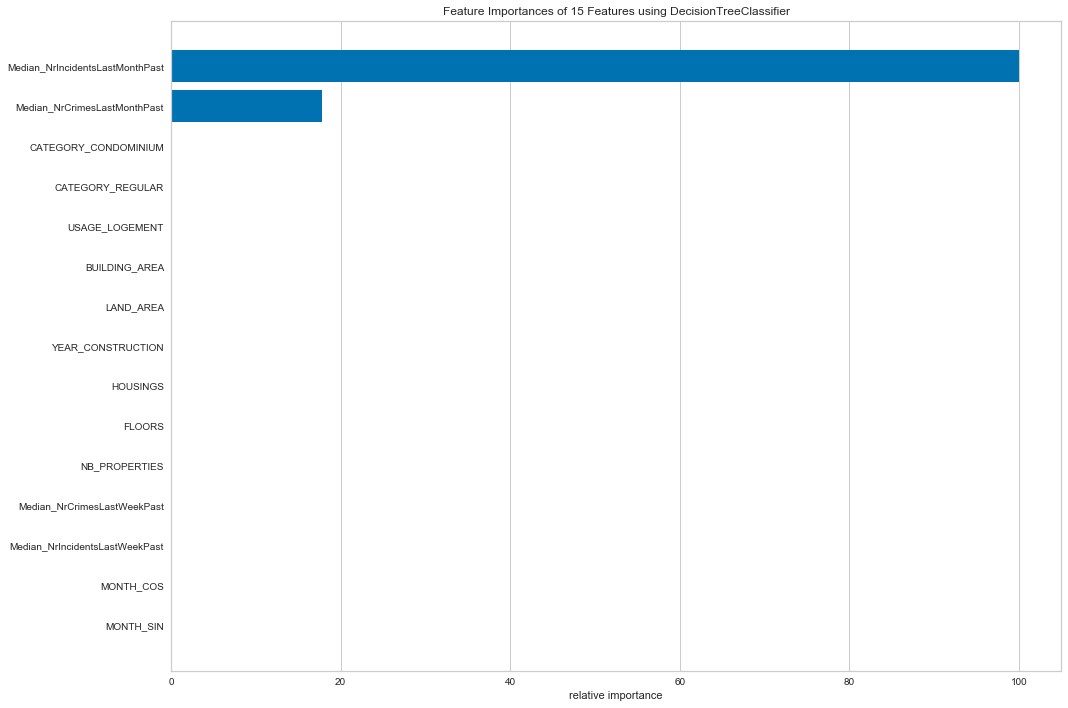

In [41]:
from yellowbrick.features import FeatureImportances

fi = FeatureImportances(dtree_model, labels = features, size = (1080, 720), colors=["C0"])
fi.fit(X_train, y_train)
fi.finalize()

/Users/dbotnari/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/dbotnari/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


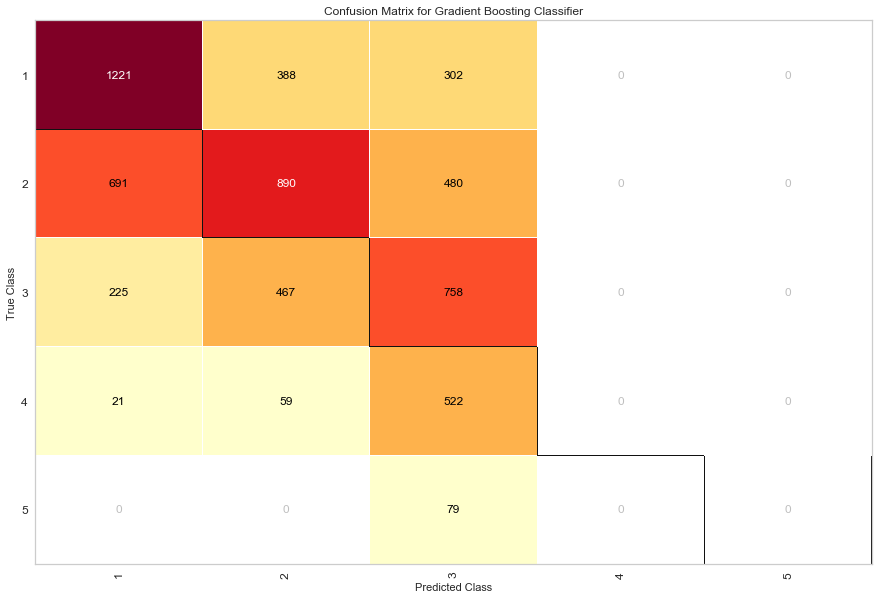

In [43]:
from yellowbrick.classifier import ConfusionMatrix
my_title = "Confusion Matrix for Gradient Boosting Classifier"

#classes = ["1", "2", "3", "4", "5"]

cle = ConfusionMatrix(dtree_model, size = (1080, 720), title=my_title, show=False)
cle.score(X_test, y_test)
cle.finalize()

/Users/dbotnari/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/dbotnari/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


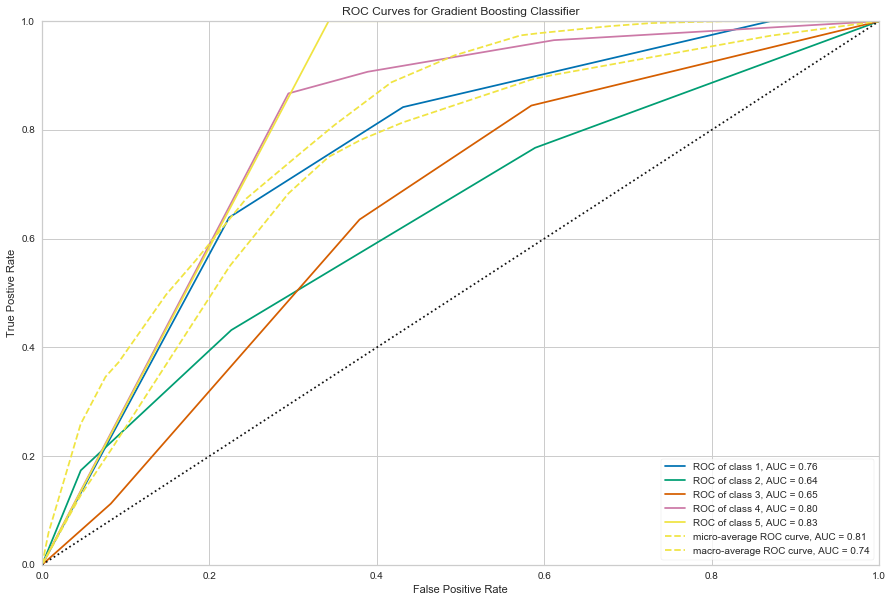

In [44]:
from yellowbrick.classifier import ROCAUC
my_title = "ROC Curves for Gradient Boosting Classifier"

#classes = ["1", "2", "3", "4", "5"]

cle = ROCAUC(dtree_model, size = (1080, 720), title=my_title, show=False)
cle.score(X_test, y_test)

cle.finalize()

/Users/dbotnari/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


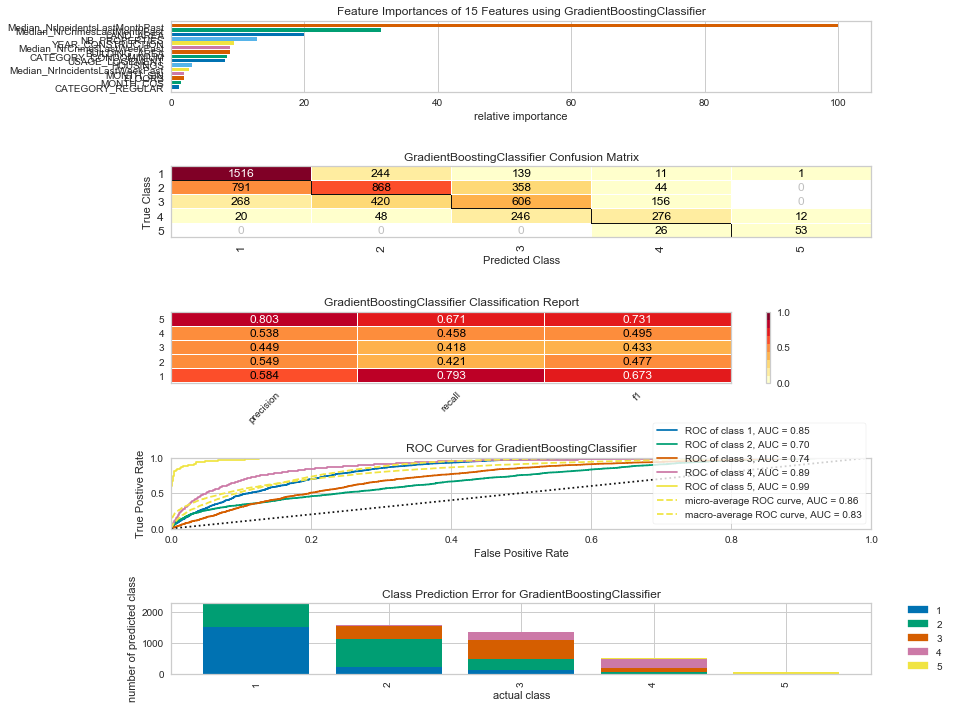

In [45]:
import matplotlib.pyplot as plt

from yellowbrick.features import FeatureImportances
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from sklearn.ensemble import GradientBoostingClassifier

fig, axes = plt.subplots(ncols=1, nrows=5, constrained_layout=False)

model = GradientBoostingClassifier()
visualgrid = [
    FeatureImportances(model, labels = features, ax=axes[0], size = (1080, 720)),
    ConfusionMatrix(model, ax=axes[1], size = (1080, 720)),
    ClassificationReport(model, ax=axes[2], size = (1080, 720)),
    ROCAUC(model, ax=axes[3], size = (1080, 720)),
    ClassPredictionError(model, ax=axes[4], size = (1080, 720))
]

for viz in visualgrid:
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.finalize()

plt.show()